In [15]:
import numpy as np
import forcing
import simulation
import plot
from constants import (gravity as g,
                       glen_flow_law as n,
                       ice_density as ρ_I,
                       water_density as ρ_W,
                       glen_flow_law as n,
                       glen_coefficient as A,
                       friction_coefficient as C,
                       bedrock_rigidity as D,
                       theta as θ
                      )
import matplotlib.pyplot as plt

In [16]:
# Simulation parameters
N = 100000
Sbar = .5
Sσ = Sbar/1.
Obar = forcing.Ωbar(C,A,θ,simulation.m(n))
Oσ = 0.0
dt = 1.0

In [17]:
Ω,smb=simulation.initialize_forcing(Sbar,Sσ,Obar,Oσ,N)

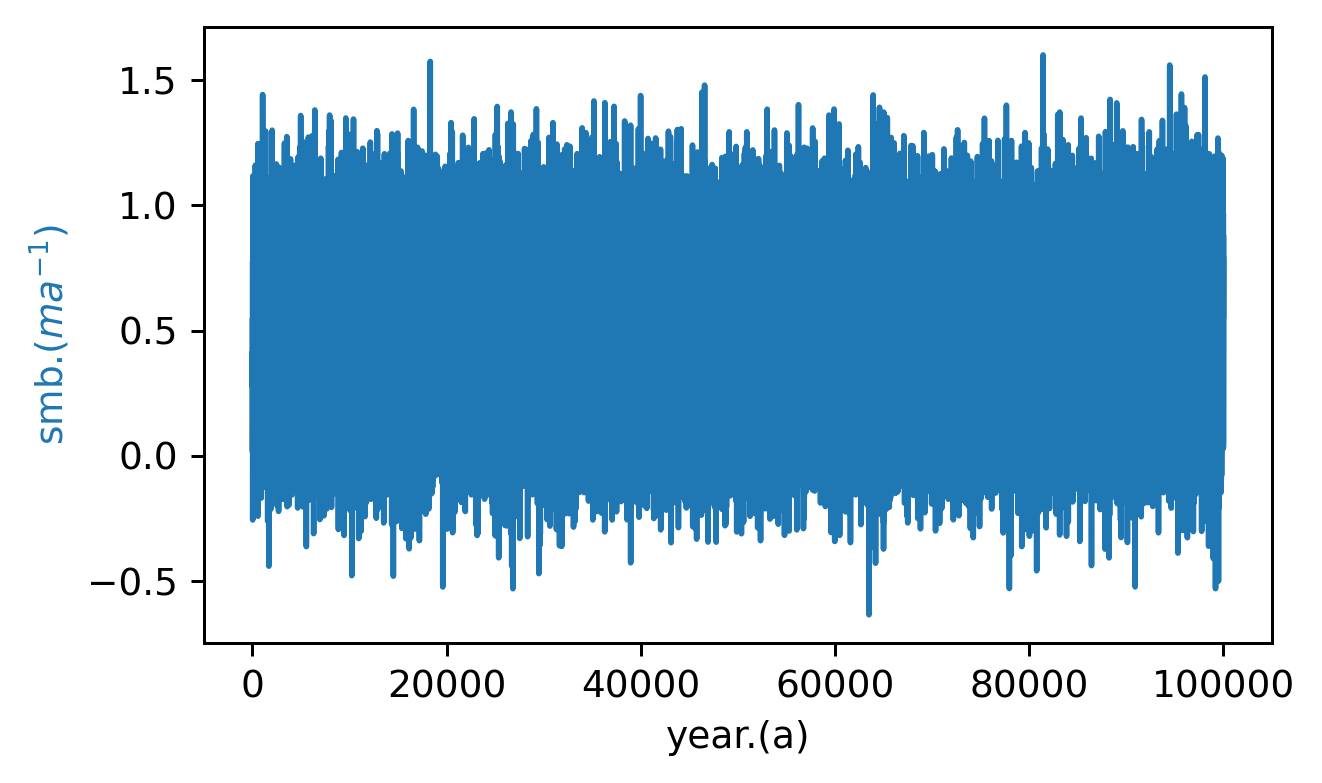

In [18]:
fig,ax,plots=plot.makefig01(1)
plot.figure01(fig,ax,smb,N,dt,label=r'smb.($ma^{-1}$)')


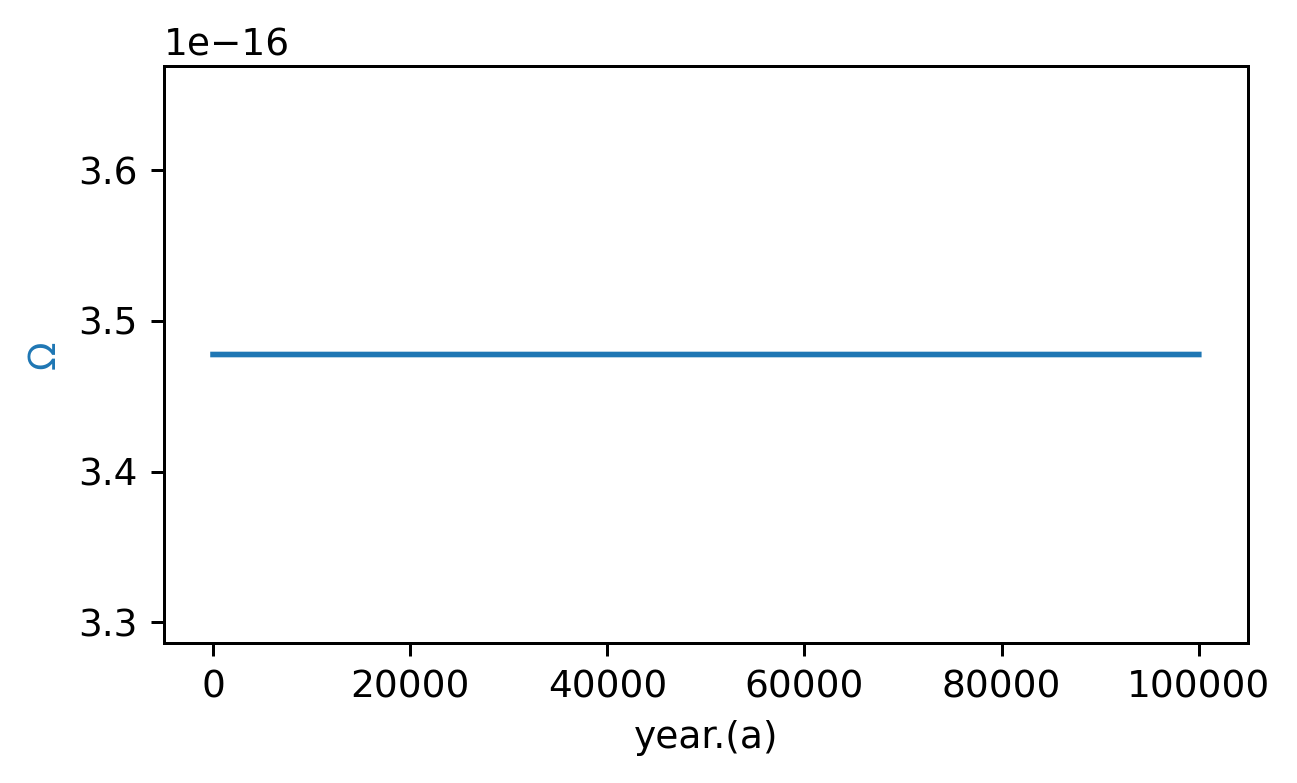

In [19]:
fig,ax,plots=plot.makefig01(1)
plot.figure01(fig,ax,Ω,N,dt,label=r'Ω')


In [20]:
b0=-100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,b0,m0,Sbar,Obar)
print(H0)
print(L0)

1412.2760859959224
184622.39967033398


In [ ]:
D = np.array([1e20])
fig1,ax1,ax2,plots=plot.makefig02(1)
fig2,ax,plots=plot.makefig01(1)
for i in range(len(D)):
    H,L,M,Q,Qg=simulation.simulation(H0,L0,m0,b0,Ω,smb,N,D[i])
    plot.figure02(fig1,ax1,ax2,H,L/1000,N,dt)
    plot.figure01(fig2,ax,M,N,dt,label=r'slope')

In [ ]:
fig,ax,plots=plot.makefig01(1)
plot.figure01(fig,ax,M*L+b0,N,dt,label=r'slope')